<a href="https://colab.research.google.com/github/srumangala/Deep_learning/blob/main/MNIST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing a simple DNN with MNIST

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

Load Dataset and normalize input

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train/255.0
x_test = x_test/255.0
class_names=['0','1','2','3','4','5','6','7','8','9']
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Viewing input image

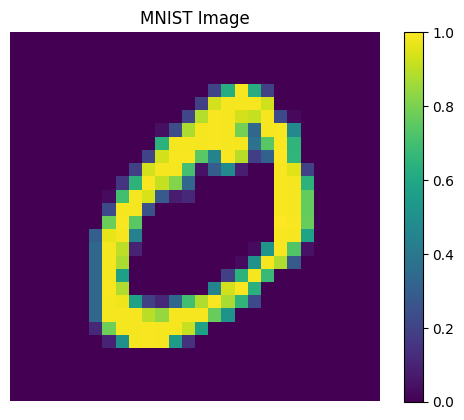

In [5]:
plt.figure()
plt.imshow(x_train[1])
plt.title('MNIST Image')
plt.colorbar()
plt.axis("off")
plt.show()

First 25 Images and corresponding class

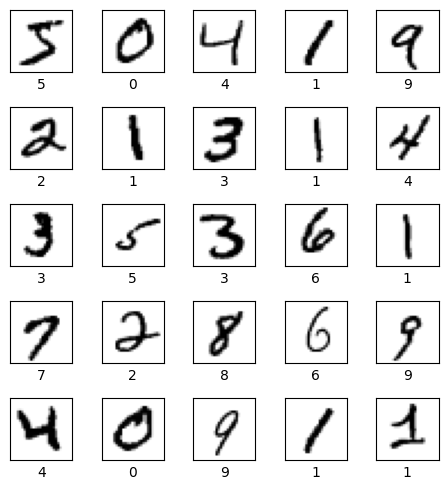

In [6]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)  # 5 rows, 5 columns, i+1th plot
    plt.xticks([]) # remove tick marks
    plt.yticks([])
    plt.grid(False) # removes grid lines
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    plt.tight_layout()
plt.show()

Defining The network

```model = keras.Sequential([...]):``` This line creates an instance of a Sequential model. The Sequential model is a linear stack of layers, where you can add layers one by one in sequence.

Layer 1 convers 28 x 28 to 1D array with 784 pixels

In [7]:
model = keras.Sequential ([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')])

Setting Optimizer and Compiling model

Using Stochastic Gradient Descent optimizer and sparce categorical cross entropy which is similar to categorical CE

In [8]:
opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train,y_train,batch_size=32, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2960 - accuracy: 0.9157 - val_loss: 0.1702 - val_accuracy: 0.9517
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1461 - accuracy: 0.9577 - val_loss: 0.1229 - val_accuracy: 0.9623
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1048 - accuracy: 0.9697 - val_loss: 0.1063 - val_accuracy: 0.9682
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0829 - accuracy: 0.9757 - val_loss: 0.0841 - val_accuracy: 0.9756
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0677 - accuracy: 0.9808 - val_loss: 0.0836 - val_accuracy: 0.9746
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0567 - accuracy: 0.9837 - val_loss: 0.0748 - val_accuracy: 0.9769
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0485 - accuracy: 0.9863 - val_loss: 0.0740 - val_accuracy:

Plotting Training and Validation loss and accuracy

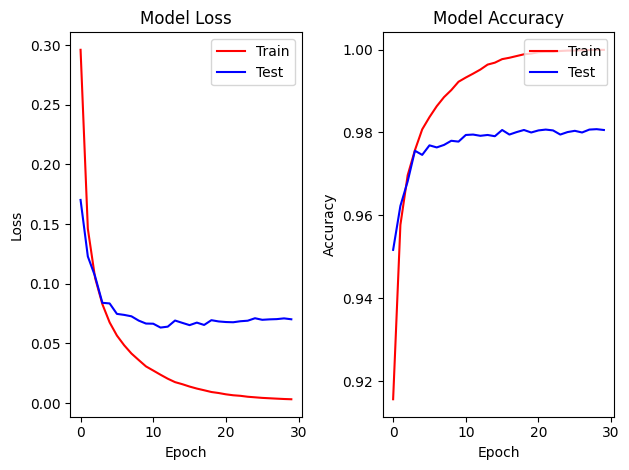

In [10]:
plt.subplot(1, 2,1) # 1 row 2 columns, 1st column
#plt.figure(figsize=(3, 3))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.subplot(1, 2, 2) # 1 row 2 columns, 2nd column
#plt.figure(figsize=(3, 3))
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.tight_layout()
plt.show()

Viewing predicted and actual class of image

In [11]:
x_predict=model.predict(x_test) # set of predicted values

313/313 [==============================] - 1s 2ms/step


In [13]:
print(x_predict[0]) # probability for all classes
np.argmax(x_predict[0]) # max probability index

[3.27290167e-10 1.53875385e-11 8.76293793e-09 1.97690110e-06
 4.25400123e-12 2.19819427e-10 1.56231568e-14 9.99997854e-01
 1.04660516e-10 1.56569826e-07]


7

In [15]:
y_test[0] # testing actual results

7

Plotting predictions for 1 image

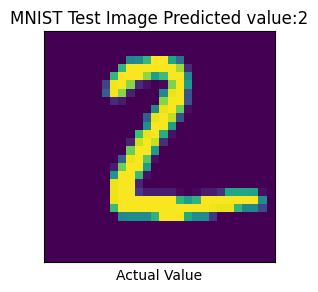

In [22]:
i=1
plt.figure(figsize=(3, 3))
plt.imshow(x_test[i])
plt.title('MNIST Test Image Predicted value:'+str((tf.argmax(x_predict[i]).numpy())))
plt.xticks([])
plt.yticks([])
plt.xlabel('Actual Value')
plt.show()

Plotting predictions for 25 images

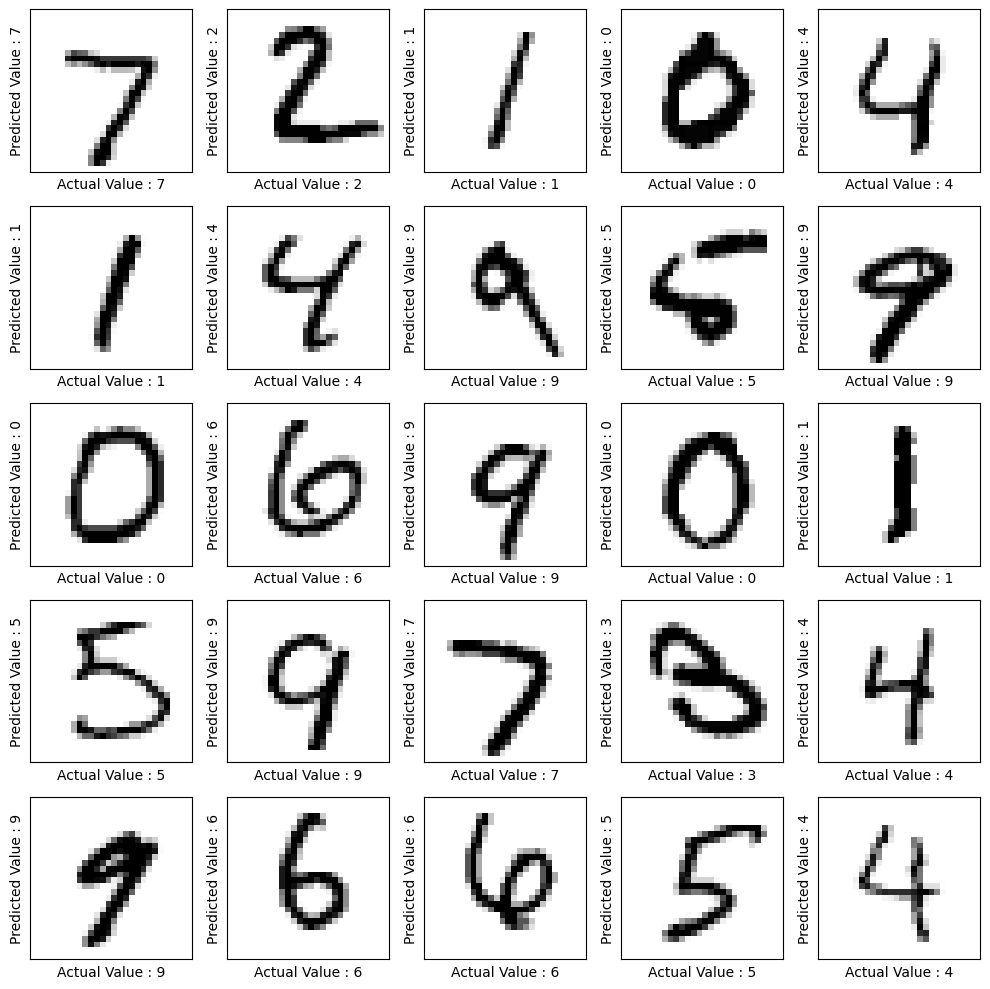

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)  # 5 rows, 5 columns, i+1th plot
    plt.xticks([]) # remove tick marks
    plt.yticks([])
    plt.grid(False) # removes grid lines
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel('Actual Value : '+class_names[y_test[i]])
    plt.ylabel('Predicted Value : '+class_names[(tf.argmax(x_predict[i]).numpy())])
    plt.tight_layout() # to make everything look good
plt.show()

Seperating result into prediction probability and class label

In [90]:
y_predict_class_value = np.round(tf.squeeze(tf.math.reduce_max(x_predict, axis=1)).numpy()*100,2) # capturing only the max values and rounding them, reducing dimensions
print(y_predict_class_value) # value of maximum probability
y_predict_class_label=tf.argmax(x_predict,axis=1) # capturing max argument so that class prediction is obtained
print(y_predict_class_label) # predicted class

[100. 100. 100. ... 100. 100. 100.]
tf.Tensor([7 2 1 ... 4 5 6], shape=(10000,), dtype=int64)


Comparing with actual y_test for errors

In [91]:
incorrect_indices= tf.squeeze(tf.where(tf.not_equal(y_predict_class_label, y_test))).numpy() # capturing the incorrect indices by checking equality
print(len(incorrect_indices)) # these many wrong classifications

194


Plotting 25 of wrong classifications with predicted value and accuracy with actual value

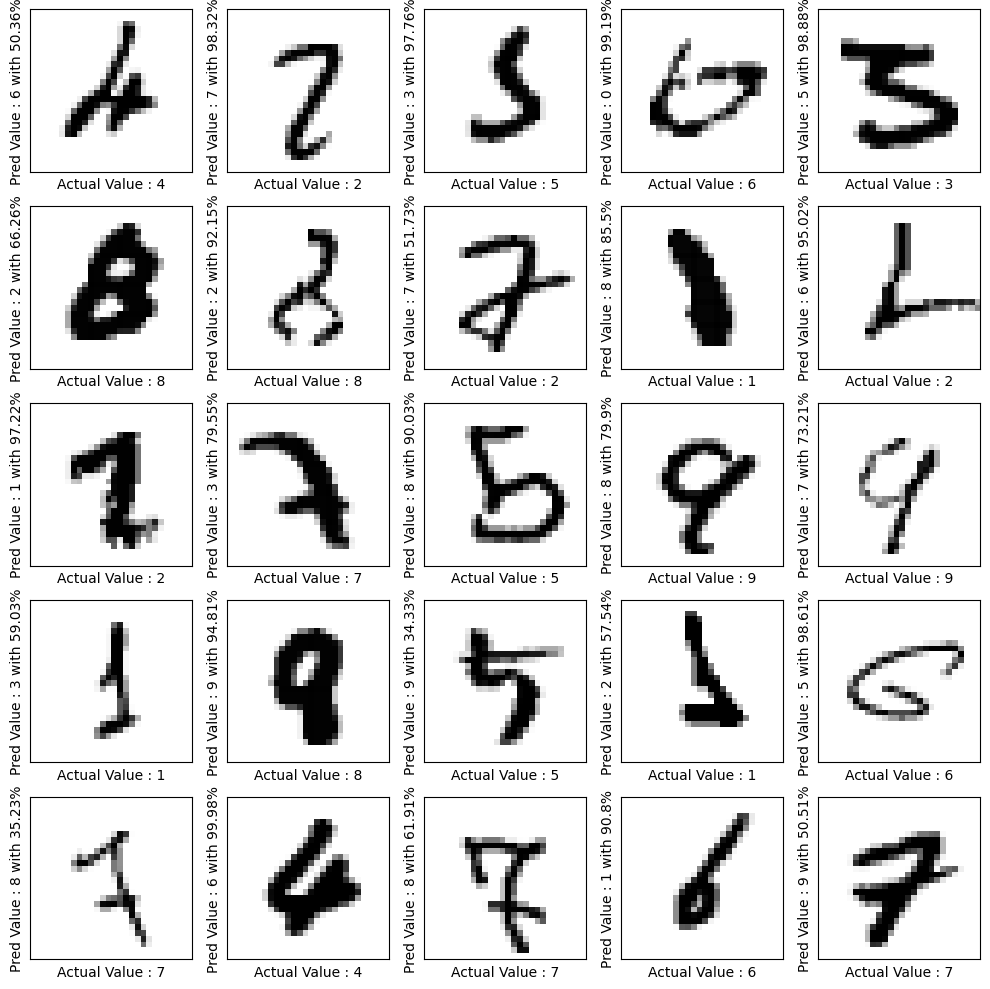

In [94]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)  # 5 rows, 5 columns, i+1th plot
    plt.xticks([]) # remove tick marks
    plt.yticks([])
    plt.grid(False) # removes grid lines
    plt.imshow(x_test[incorrect_indices[i]], cmap=plt.cm.binary) # black and white
    plt.xlabel('Actual Value : '+class_names[y_test[incorrect_indices[i]]])
    plt.ylabel('Pred Value : '+str(class_names[(tf.argmax(x_predict[incorrect_indices[i]]).numpy())])+' with '+ str(y_predict_class_value[incorrect_indices[i]])+'%')
    #plt.title('Prediction accuracy'+str(y_predict_class_value[incorrect_indices[i]].numpy()*100))
    plt.tight_layout()
plt.show()